In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr, chi2_contingency, f_oneway, kruskal
from sklearn.preprocessing import LabelEncoder

In [160]:
df=pd.read_csv('/content/auto_mpg_dataset.csv')

In [161]:
df.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg
0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,18.0
1,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,15.0
2,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,18.0
3,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,16.0
4,8,302.0,140.0,3449.0,10.5,70,1,ford torino,17.0


In [162]:
df.describe()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,5.454774,193.425879,-1404.643216,2970.424623,15.568090,76.010050,1.572864,23.514573
std,1.701004,104.269838,12213.424763,846.841774,2.757689,3.697627,0.802055,7.815984
min,3.000000,68.000000,-100000.000000,1613.000000,8.000000,70.000000,1.000000,9.000000
25%,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000,17.500000
50%,4.000000,148.500000,92.000000,2803.500000,15.500000,76.000000,1.000000,23.000000
75%,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000,29.000000
max,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000,46.600000


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     398 non-null    int64  
 1   displacement  398 non-null    float64
 2   horsepower    398 non-null    float64
 3   weight        398 non-null    float64
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
 6   origin        398 non-null    int64  
 7   car_name      398 non-null    object 
 8   mpg           398 non-null    float64
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


In [164]:
numerical_col=df.select_dtypes(include=['int64','float64']).columns
catagorical_col=df.select_dtypes(include=['object']).columns

In [165]:
numerical_col,catagorical_col

(Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
        'model_year', 'origin', 'mpg'],
       dtype='object'),
 Index(['car_name'], dtype='object'))

# Univariate analysis

## Numerical column

In [166]:
import matplotlib.pyplot as plt

def univariate_numerical_column(column_name):
    # Calculate statistics
    mean_value = df[column_name].mean()
    median_value = df[column_name].median()
    mode_value = df[column_name].mode()[0]
    missing_values = df[column_name].isnull().sum()
    value_counts = df[column_name].value_counts()

    print(f"Analysis of column: {column_name}")
    print(f"Mean: {mean_value}")
    print(f"Median: {median_value}")
    print(f"Mode: {mode_value}")
    print(f"Missing Values: {missing_values}")
    print(f"Value Counts:\n{value_counts}")

    skewness = df[column_name].skew()
    print(f"Skewness: {skewness}")


    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    df[column_name].plot(kind='hist', ax=axes[0], title=f'Histogram of {column_name}', bins=20)
    df[column_name].plot(kind='kde', ax=axes[1], title=f'KDE of {column_name}')
    df[column_name].plot(kind='box', ax=axes[2], title=f'Boxplot of {column_name}')

    plt.tight_layout()
    plt.show()

### For displacement
**Conclusion :**
- The distribution of displacement is right-skewed, with a skewness of 0.72.
- The mean (193.43) is higher than the median (148.5), indicating the presence of higher displacement values pulling the average up.
- The most common displacement value is 97.0, reflecting a concentration of smaller engines.
- There are no missing values in the displacement column.
- The data exhibits a wide range of displacement values, with some highly frequent values such as 97.0, 350.0, and 318.0, showing variability in engine sizes.

Analysis of column: displacement
Mean: 193.42587939698493
Median: 148.5
Mode: 97.0
Missing Values: 0
Value Counts:
displacement
97.0     21
98.0     18
350.0    18
318.0    17
250.0    17
         ..
104.0     1
110.0     1
130.0     1
111.0     1
144.0     1
Name: count, Length: 82, dtype: int64
Skewness: 0.7196451643005952


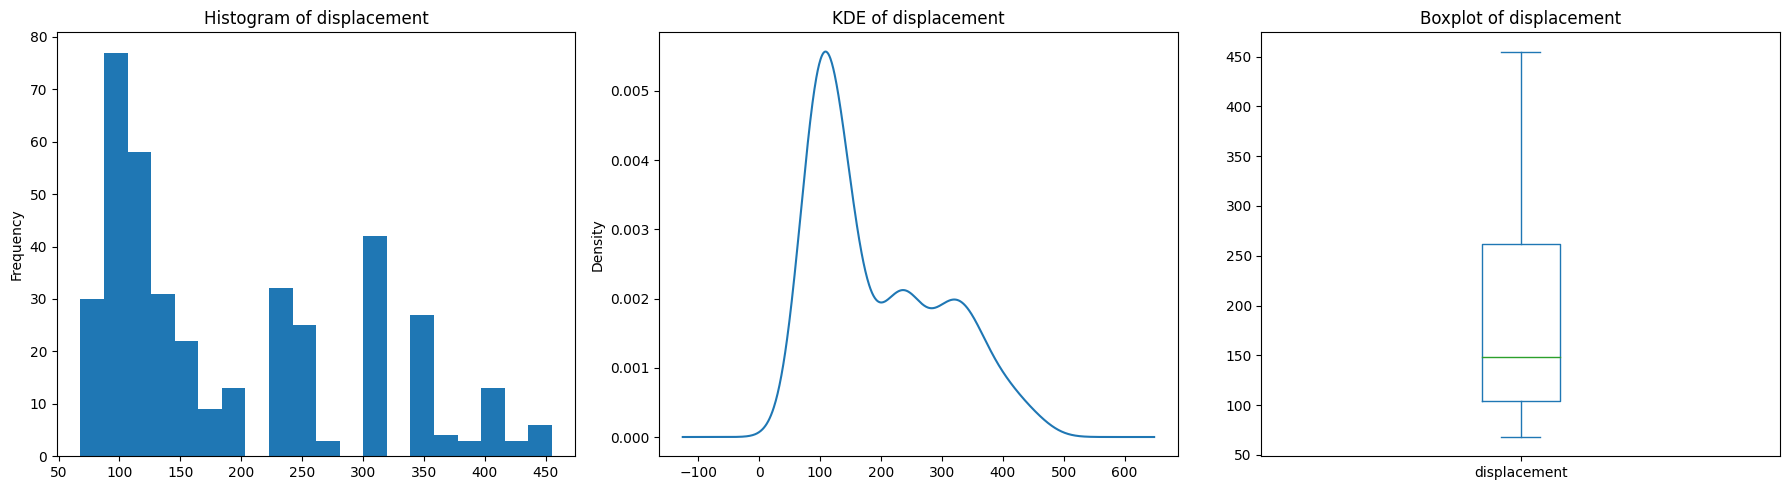

In [167]:
univariate_numerical_column(numerical_col[1])

### For horsepower
**Conclusion :**
- The average horsepower is relatively moderate, with many cars clustering around lower values (as indicated by the median and mode).
- The positive skewness suggests a concentration of lower horsepower cars, but the presence of higher horsepower values may indicate a mix of car types (e.g., economy cars vs. performance cars).
- The missing values need to be addressed to ensure that subsequent analyses and model training are robust and accurate.

Analysis of column: horsepower
Mean: -1404.643216080402
Median: 92.0
Mode: 150.0
Missing Values: 0
Value Counts:
horsepower
150.0    22
90.0     20
88.0     19
110.0    18
100.0    17
         ..
61.0      1
93.0      1
148.0     1
152.0     1
82.0      1
Name: count, Length: 94, dtype: int64
Skewness: -7.989207058088853


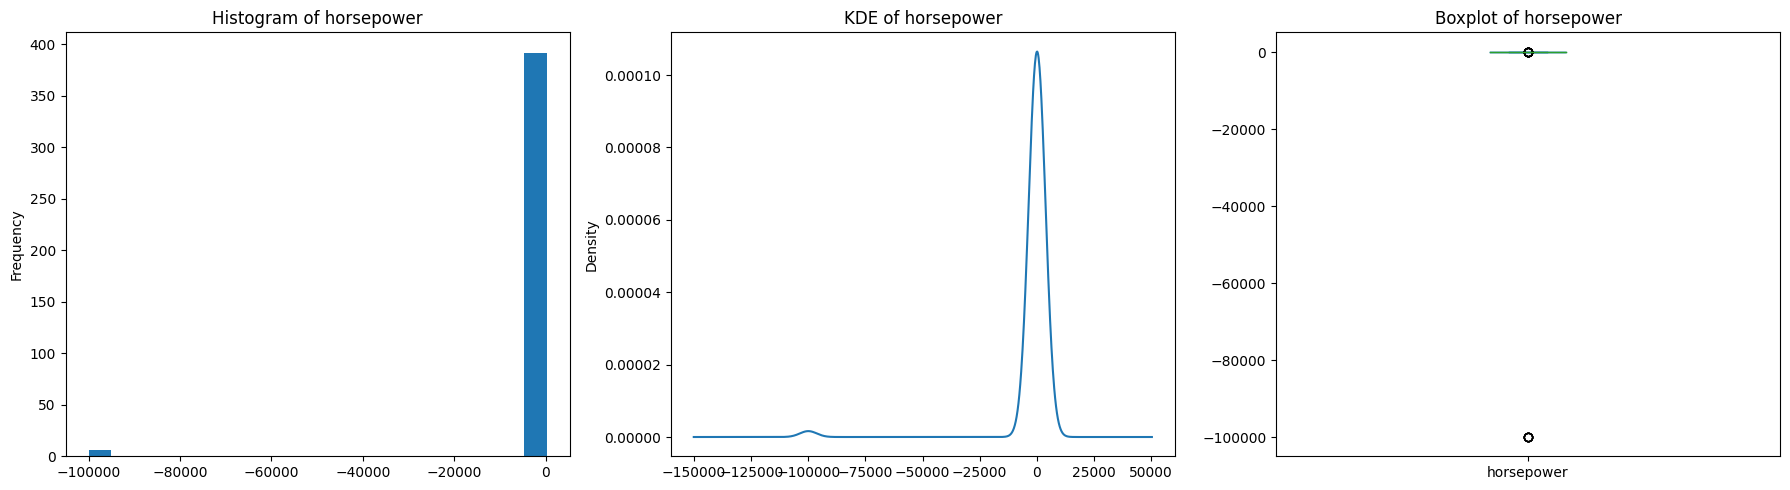

In [168]:
univariate_numerical_column(numerical_col[2])


In [169]:
# Doing outliar treatment
df['horsepower'] = df['horsepower'].where(df['horsepower'] != -100000)


Analysis of column: horsepower
Mean: 104.46938775510205
Median: 93.5
Mode: 150.0
Missing Values: 6
Value Counts:
horsepower
150.0    22
90.0     20
88.0     19
110.0    18
100.0    17
         ..
61.0      1
93.0      1
148.0     1
152.0     1
82.0      1
Name: count, Length: 93, dtype: int64
Skewness: 1.0873262824048695


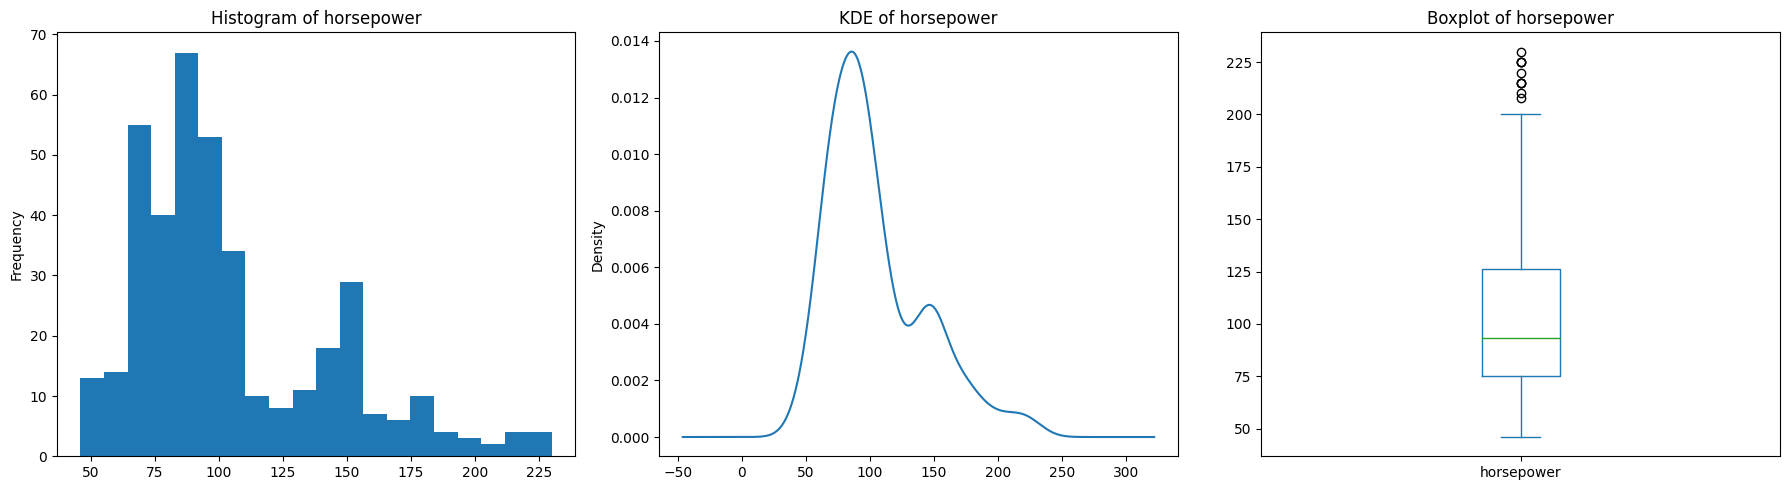

In [170]:
univariate_numerical_column(numerical_col[2])

In [171]:
df = df.dropna(subset=['horsepower']).reset_index(drop=True)

### Doing for weight
**conclusion :**
- The dataset exhibits a mix of lighter and heavier vehicles, with a slight tendency towards heavier cars. Understanding how weight influences fuel consumption (e.g., mpg) can provide valuable insights into vehicle efficiency and performance.

Analysis of column: weight
Mean: 2977.5841836734694
Median: 2803.5
Mode: 1985.0
Missing Values: 0
Value Counts:
weight
1985.0    4
2130.0    4
2125.0    3
2720.0    3
2945.0    3
         ..
3102.0    1
3664.0    1
2807.0    1
2660.0    1
2625.0    1
Name: count, Length: 346, dtype: int64
Skewness: 0.5195856740558396


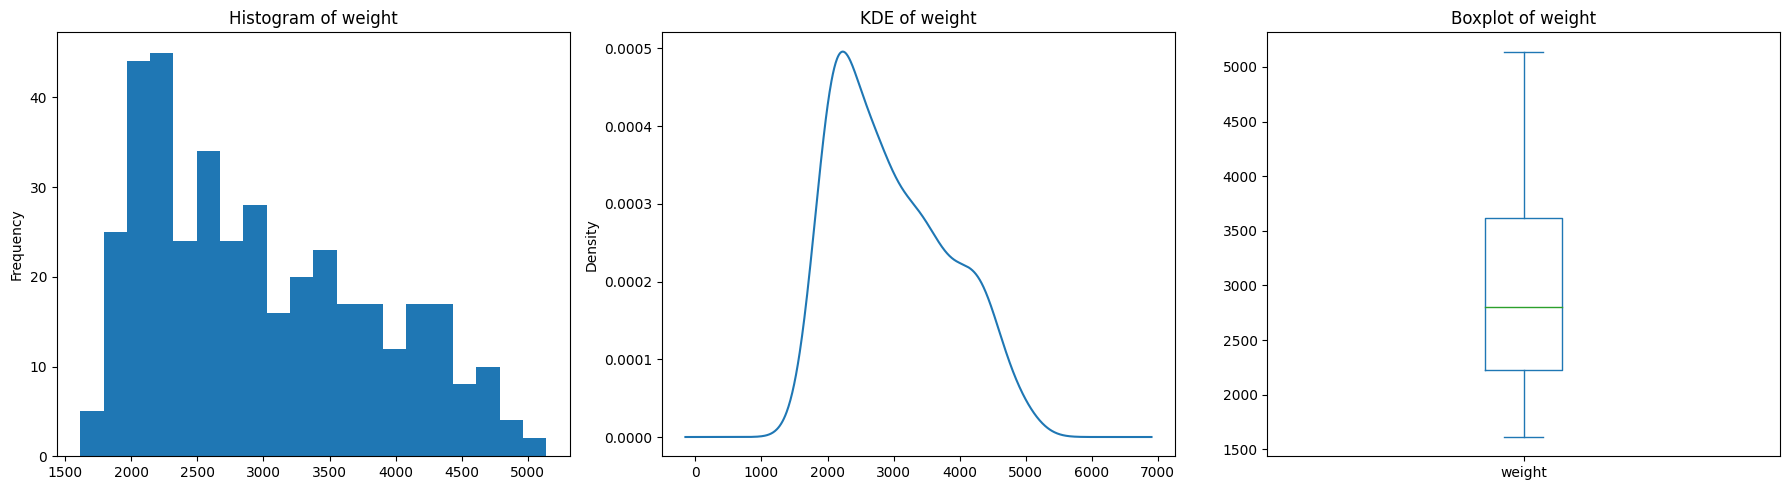

In [172]:
univariate_numerical_column(numerical_col[3])

### analysing accelaration
**Conclusion :**
- The acceleration data shows that most vehicles have a relatively similar acceleration performance, with common values around 14.5 to 16.0 seconds.
- The small skewness suggests that while most cars accelerate within a certain range, there are a few that take longer to accelerate, which may represent less powerful vehicles or different vehicle types.
- Understanding the relationship between acceleration and other variables, such as weight and horsepower, could provide further insights into vehicle performance characteristics.







Analysis of column: acceleration
Mean: 15.541326530612244
Median: 15.5
Mode: 14.5
Missing Values: 0
Value Counts:
acceleration
14.5    23
15.5    21
14.0    16
16.0    16
13.5    15
        ..
11.1     1
12.1     1
21.9     1
22.1     1
11.6     1
Name: count, Length: 95, dtype: int64
Skewness: 0.29158692574060485


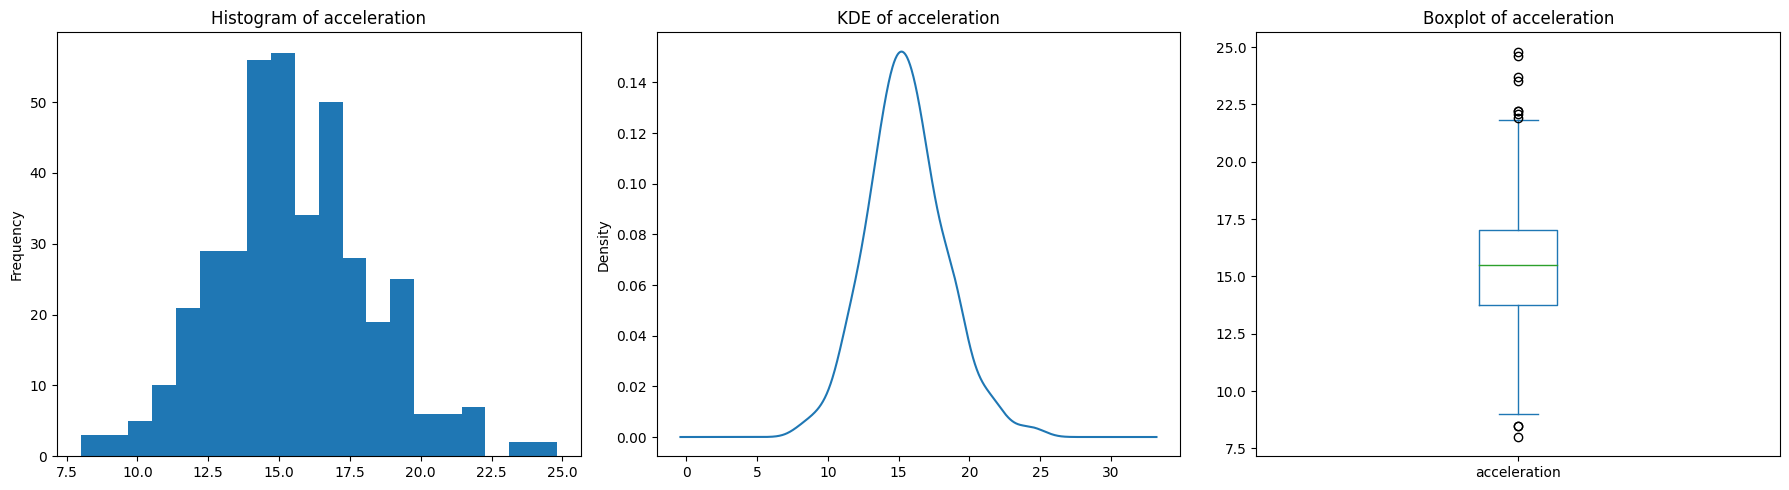

In [173]:
univariate_numerical_column(numerical_col[4])

### Anlysing model year

**Conclusion :**
- The model_year analysis reveals that the dataset primarily consists of vehicles manufactured during the early to late 1970s, with 1973 being the most common year.
- The lack of skewness suggests that there are no significant outliers or trends towards newer or older vehicles in the dataset.
- Understanding how the model year relates to other factors such as horsepower and fuel consumption could provide insights into trends in automotive technology and performance over the years.

Analysis of column: model_year
Mean: 75.9795918367347
Median: 76.0
Mode: 73
Missing Values: 0
Value Counts:
model_year
73    40
78    36
76    34
75    30
82    30
70    29
79    29
72    28
77    28
81    28
71    27
80    27
74    26
Name: count, dtype: int64
Skewness: 0.019688299628885166


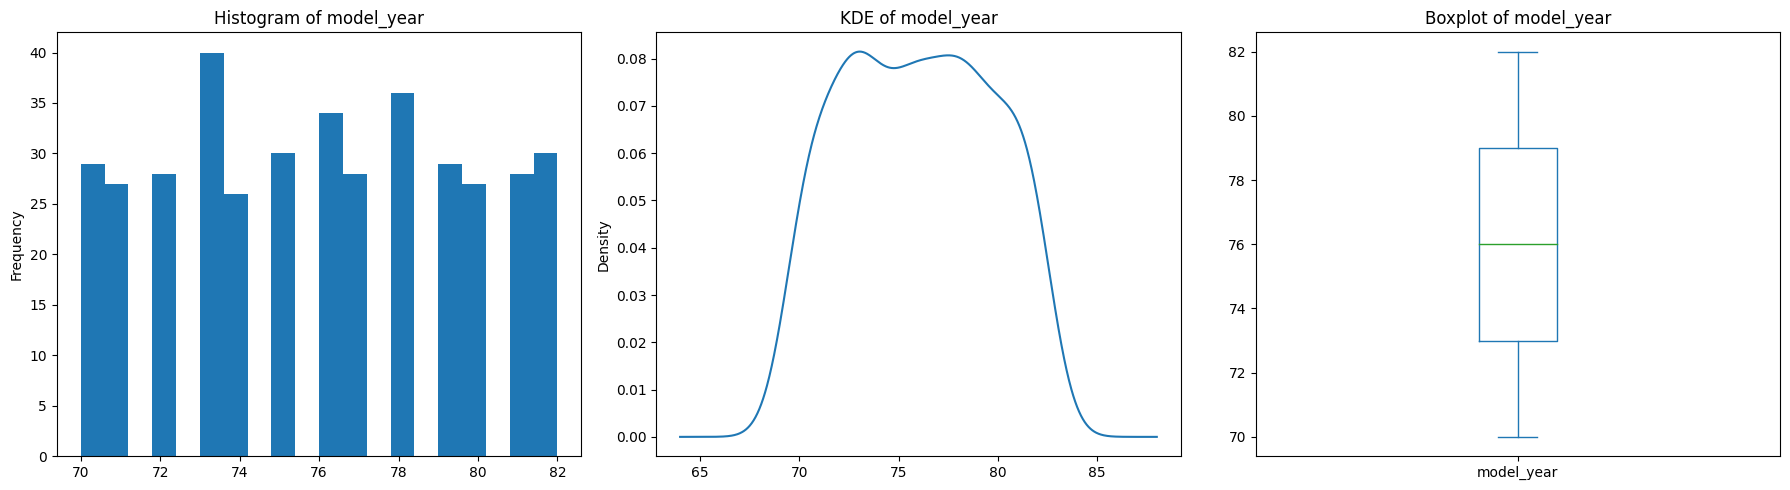

In [174]:
univariate_numerical_column(numerical_col[5])

## Catagorical column

In [175]:
def univariate_analysis_categorical(column_name):


    value_counts = df[column_name].value_counts()

    print(f"Value Counts for '{column_name}':\n{value_counts}\n")


    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x=column_name, order=value_counts.index, palette='viridis')
    plt.title(f'Bar Plot of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

    # Plot pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Pie Chart of {column_name}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

### Analysing Cylinder
**conclusion :**
- The majority of vehicles in the dataset are equipped with 4 cylinders (199), followed by 8 cylinders (103) and 6 cylinders (83), indicating a preference for these configurations among consumers.
- Vehicles with 3 cylinders (4) and 5 cylinders (3) are quite rare, suggesting they cater to niche markets.
- The prominence of 4-cylinder vehicles points to a market trend favoring fuel efficiency, while the presence of 8-cylinder vehicles highlights consumer interest in performance.
- These insights can inform automotive manufacturers about engine configuration preferences, potentially guiding future design and engineering decisions.

Value Counts for 'cylinders':
cylinders
4    199
8    103
6     83
3      4
5      3
Name: count, dtype: int64



<ipython-input-175-c59b95bea3f3>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column_name, order=value_counts.index, palette='viridis')


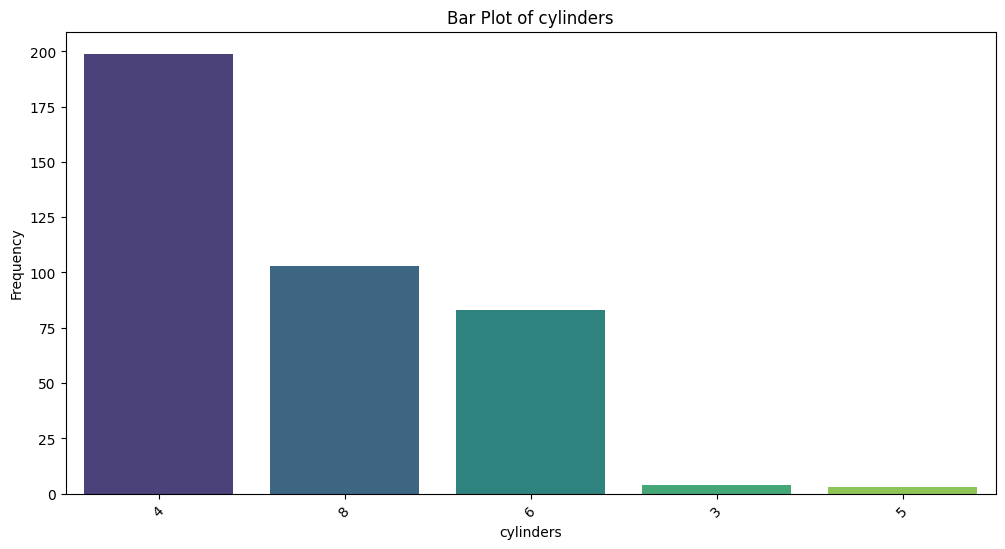

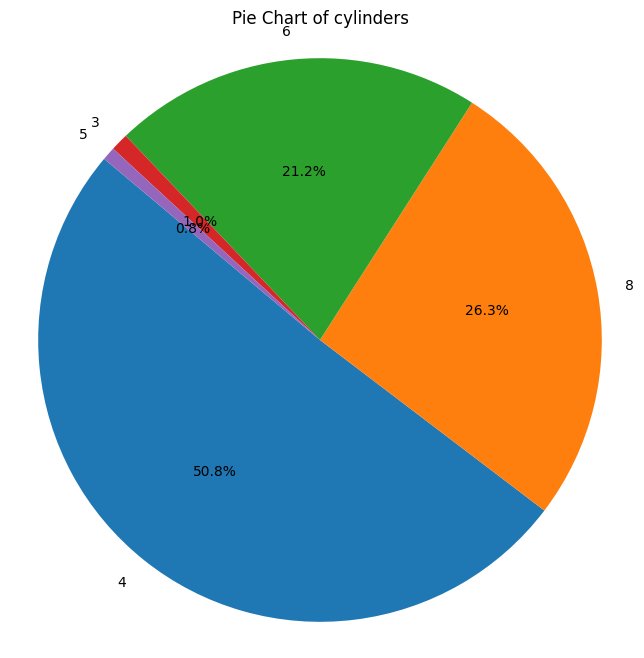

In [176]:
univariate_analysis_categorical('cylinders')

### Analysing Origin

Value Counts for 'origin':
origin
1    245
3     79
2     68
Name: count, dtype: int64



<ipython-input-175-c59b95bea3f3>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column_name, order=value_counts.index, palette='viridis')


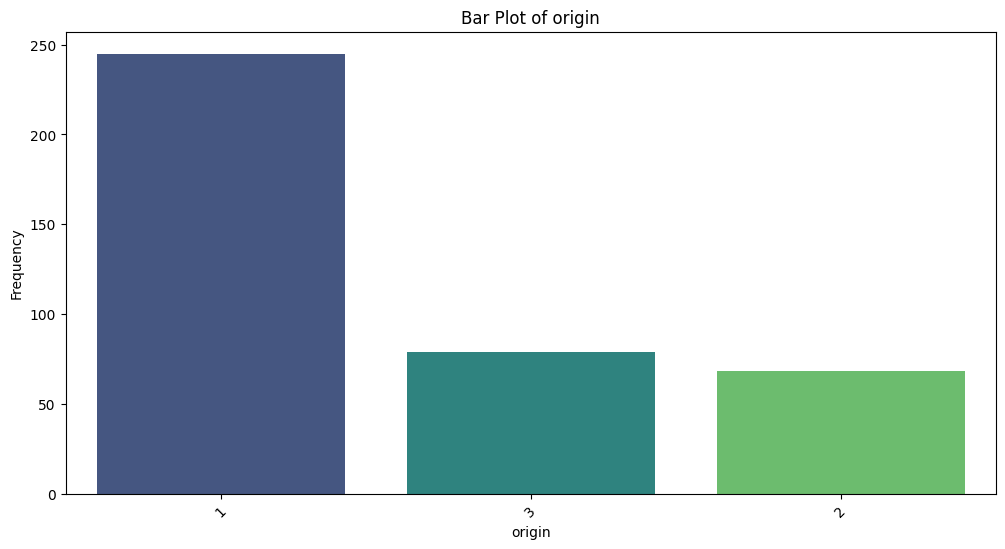

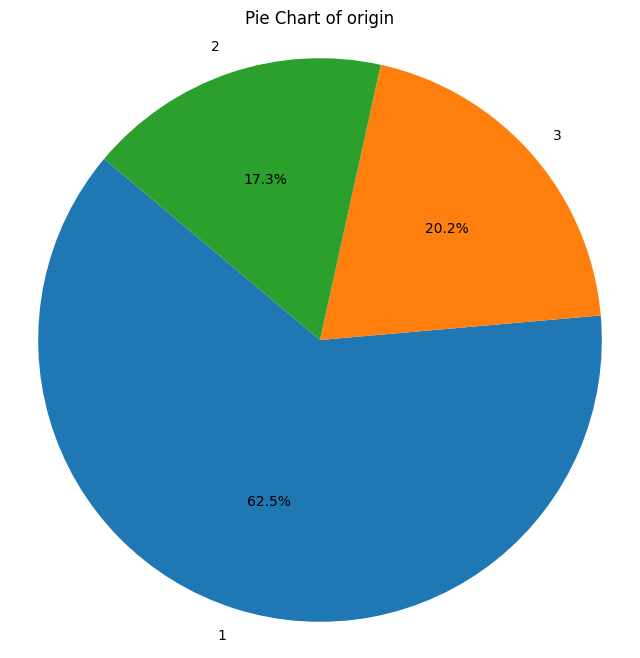

In [177]:
univariate_analysis_categorical('origin')

# Bivariate analysis




In [178]:
def num_vs_num(col1, col2):

    # Scatter plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df[col1], y=df[col2], color="blue", alpha=0.6)
    plt.title(f'Scatter plot between {col1} and {col2}')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.grid(True)
    plt.show()

    # Pearson and Spearman correlation
    pearson_corr, p_value_pearson = pearsonr(df[col1], df[col2])
    spearman_corr, p_value_spearman = spearmanr(df[col1], df[col2])

    print(f'Pearson Correlation between {col1} and {col2}: {pearson_corr} (p-value: {p_value_pearson})')
    print(f'Spearman Correlation between {col1} and {col2}: {spearman_corr} (p-value: {p_value_spearman})')



def num_vs_cat(numerical_col, categorical_col):

    # Boxplot
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df_clean, x=categorical_col, y=numerical_col, palette='viridis')
    plt.title(f'Boxplot of {numerical_col} by {categorical_col}')
    plt.xlabel(categorical_col)
    plt.ylabel(numerical_col)
    plt.xticks(rotation=45)
    plt.show()

    # ANOVA Test
    groups = [group[numerical_col].values for name, group in df_clean.groupby(categorical_col)]
    f_statistic, p_value = f_oneway(*groups)
    print(f'ANOVA F-statistic: {f_statistic}, p-value: {p_value}')

### displacement vs mpg
- key factor negatively affecting fuel consumption
- Higher displacement → Lower mpg (more fuel consumption)
- Lower displacement → Higher mpg (better fuel efficiency)

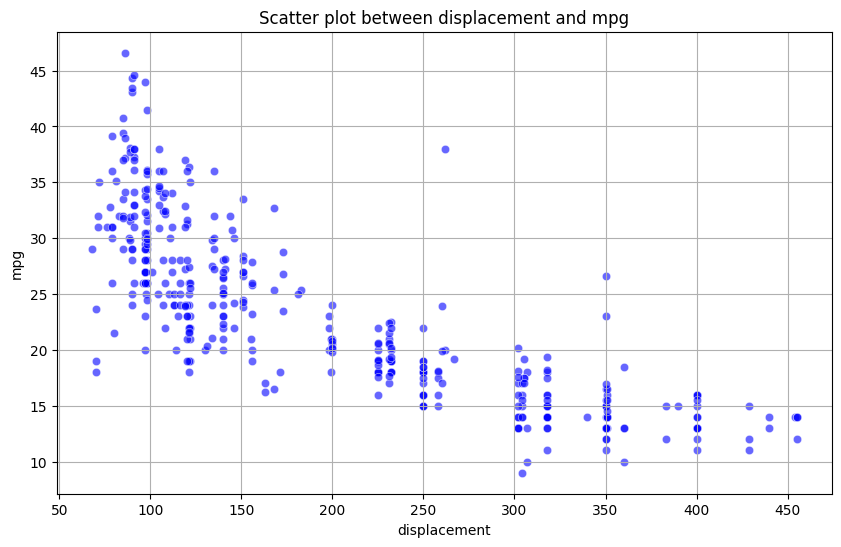

Pearson Correlation between displacement and mpg: -0.8051269467104578 (p-value: 1.6606418277978275e-90)
Spearman Correlation between displacement and mpg: -0.8552335882841171 (p-value: 2.195777599322867e-113)


In [179]:
num_vs_num(numerical_col[1],numerical_col[7])

### Horsepower vs MPG

**Conclusion :**


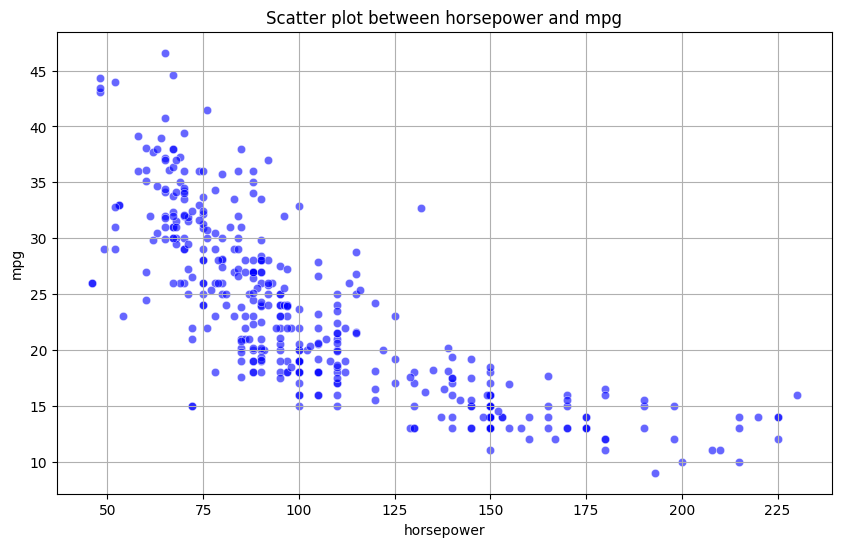

Pearson Correlation between horsepower and mpg: -0.7784267838977761 (p-value: 7.031989029403434e-81)
Spearman Correlation between horsepower and mpg: -0.8536164024453882 (p-value: 1.619383245501938e-112)


In [180]:
num_vs_num(numerical_col[2],numerical_col[7])

### Weight vs MPG
- Heavier vehicles tend to have lower fuel efficiency, which is a crucial insight for manufacturers aiming to improve mpg.
- These findings suggest that reducing vehicle weight could be a viable strategy to enhance fuel economy.
- Understanding the impact of weight on fuel consumption can inform design and engineering processes, guiding manufacturers in producing more efficient vehicles.

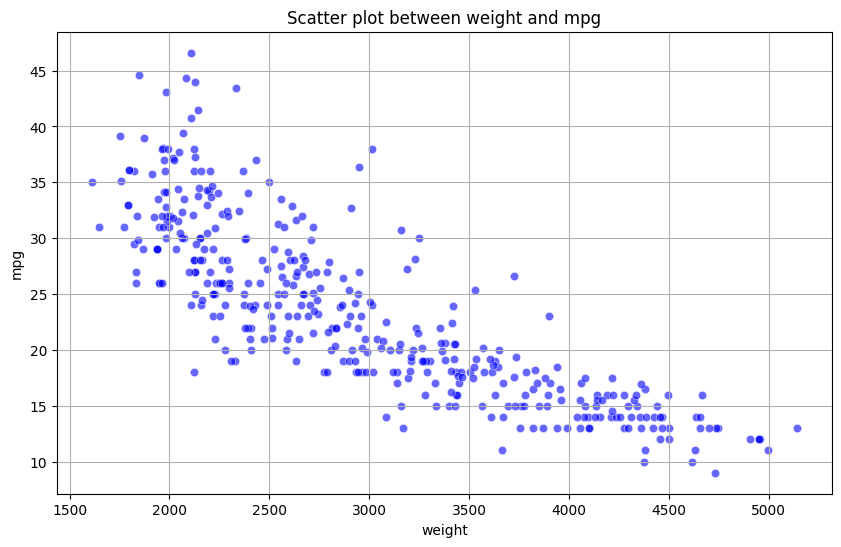

Pearson Correlation between weight and mpg: -0.8322442148315753 (p-value: 6.015296051435642e-102)
Spearman Correlation between weight and mpg: -0.8755851198739869 (p-value: 2.662377938025222e-125)


In [181]:
num_vs_num(numerical_col[3],numerical_col[7])

### Accelaration vs mpg
- There is a moderate positive correlation between acceleration and fuel efficiency, indicating that cars with better acceleration tend to achieve higher mpg.
- These insights suggest that improving a vehicle's acceleration may contribute positively to its fuel economy, although the effect is not as strong as with other factors like weight or horsepower.
- Manufacturers may consider the balance between acceleration performance and fuel efficiency in their vehicle designs, as enhancing acceleration can provide a competitive edge while maintaining reasonable fuel consumption levels.

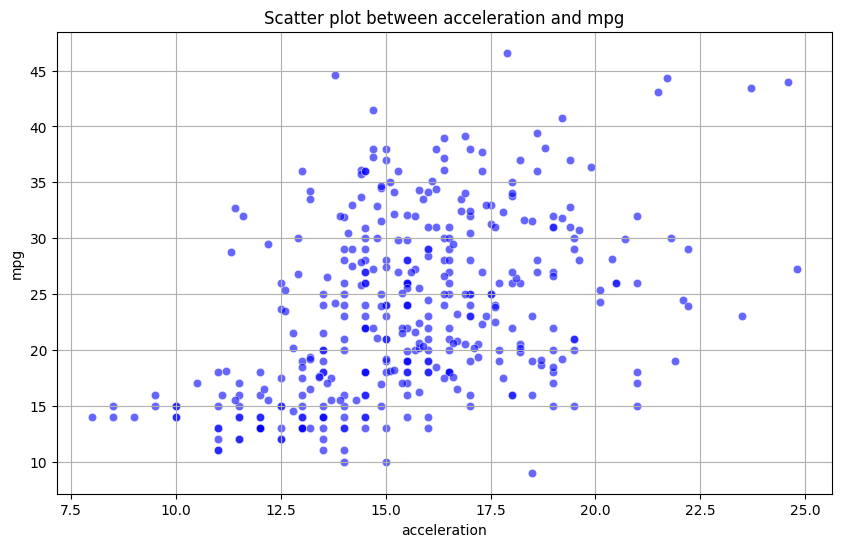

Pearson Correlation between acceleration and mpg: 0.4233285369027872 (p-value: 1.7785761248041466e-18)
Spearman Correlation between acceleration and mpg: 0.4415388584563648 (p-value: 3.903603566353263e-20)


In [182]:
num_vs_num(numerical_col[4],numerical_col[7])

## Numerical vs catagoical

### mpg vs origin
**conclusion :**
- Distinct Differences: Significant differences in mpg are observed across the three vehicle origins, with the first origin showing the highest median mpg.

- Variability: The first origin exhibits a greater variability in mpg values and contains several outliers, while the third origin displays a more concentrated range of mpg values.

- Statistical Significance: The ANOVA test results indicate a highly significant difference in mean mpg between at least two origins.

<ipython-input-178-3c1dfe094ffa>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x=categorical_col, y=numerical_col, palette='viridis')


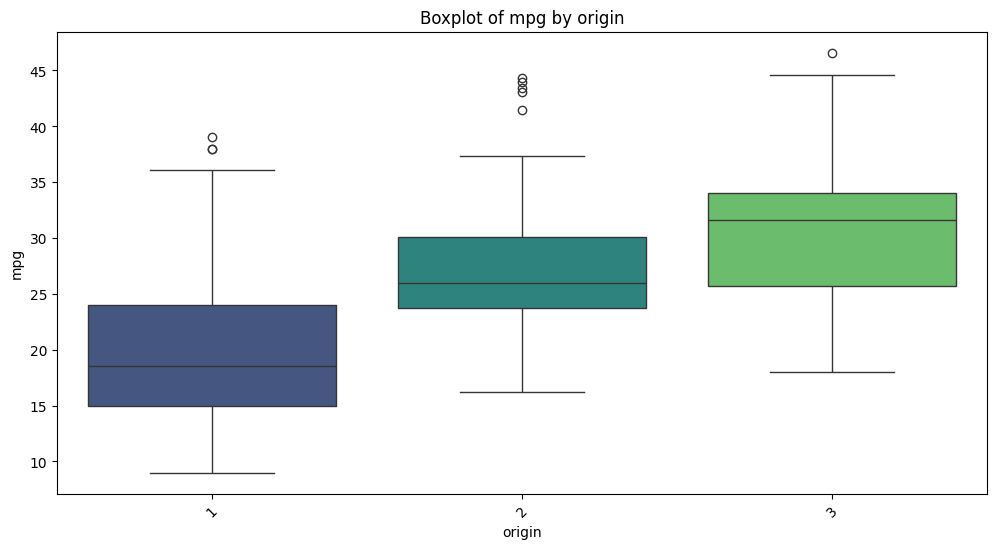

ANOVA F-statistic: 96.60153016314952, p-value: 8.673818448010683e-35


In [183]:
num_vs_cat(numerical_col[7],'origin')

### mpg vs cylinders
**Conclusion :**
- Substantial Differences: The ANOVA analysis indicates highly significant differences in mpg among the three vehicle origins, with a robust F-statistic of 172.95.

- High Variability: The variations in mpg suggest that vehicle origin plays a critical role in determining fuel efficiency, particularly highlighting the distinct characteristics of each origin group.

- Statistical Significance: The p-value of is extremely low, confirming that the differences in mean mpg across origins are statistically significant.-

<ipython-input-178-3c1dfe094ffa>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x=categorical_col, y=numerical_col, palette='viridis')


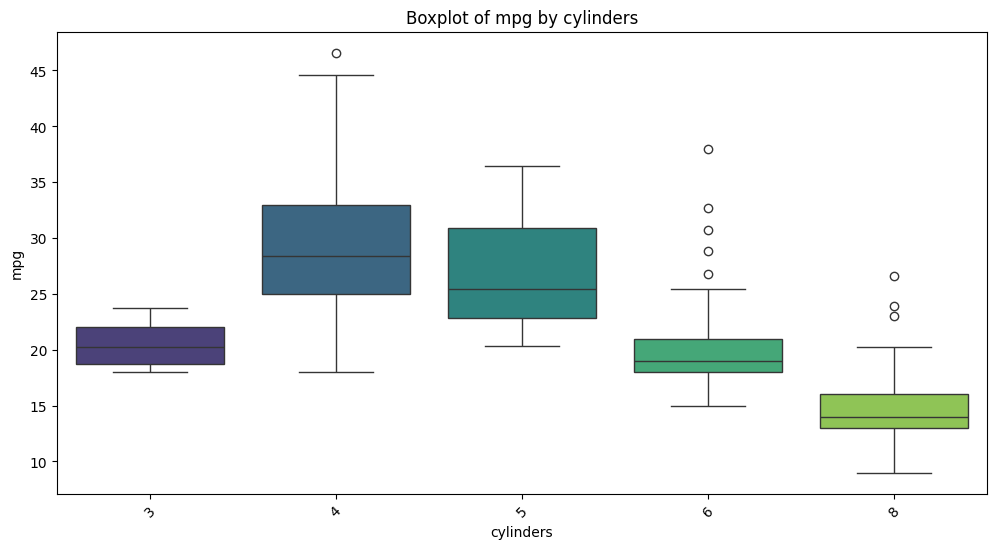

ANOVA F-statistic: 172.95462925955232, p-value: 8.785541055264391e-85


In [184]:
num_vs_cat(numerical_col[7],'cylinders')

### Pair plot

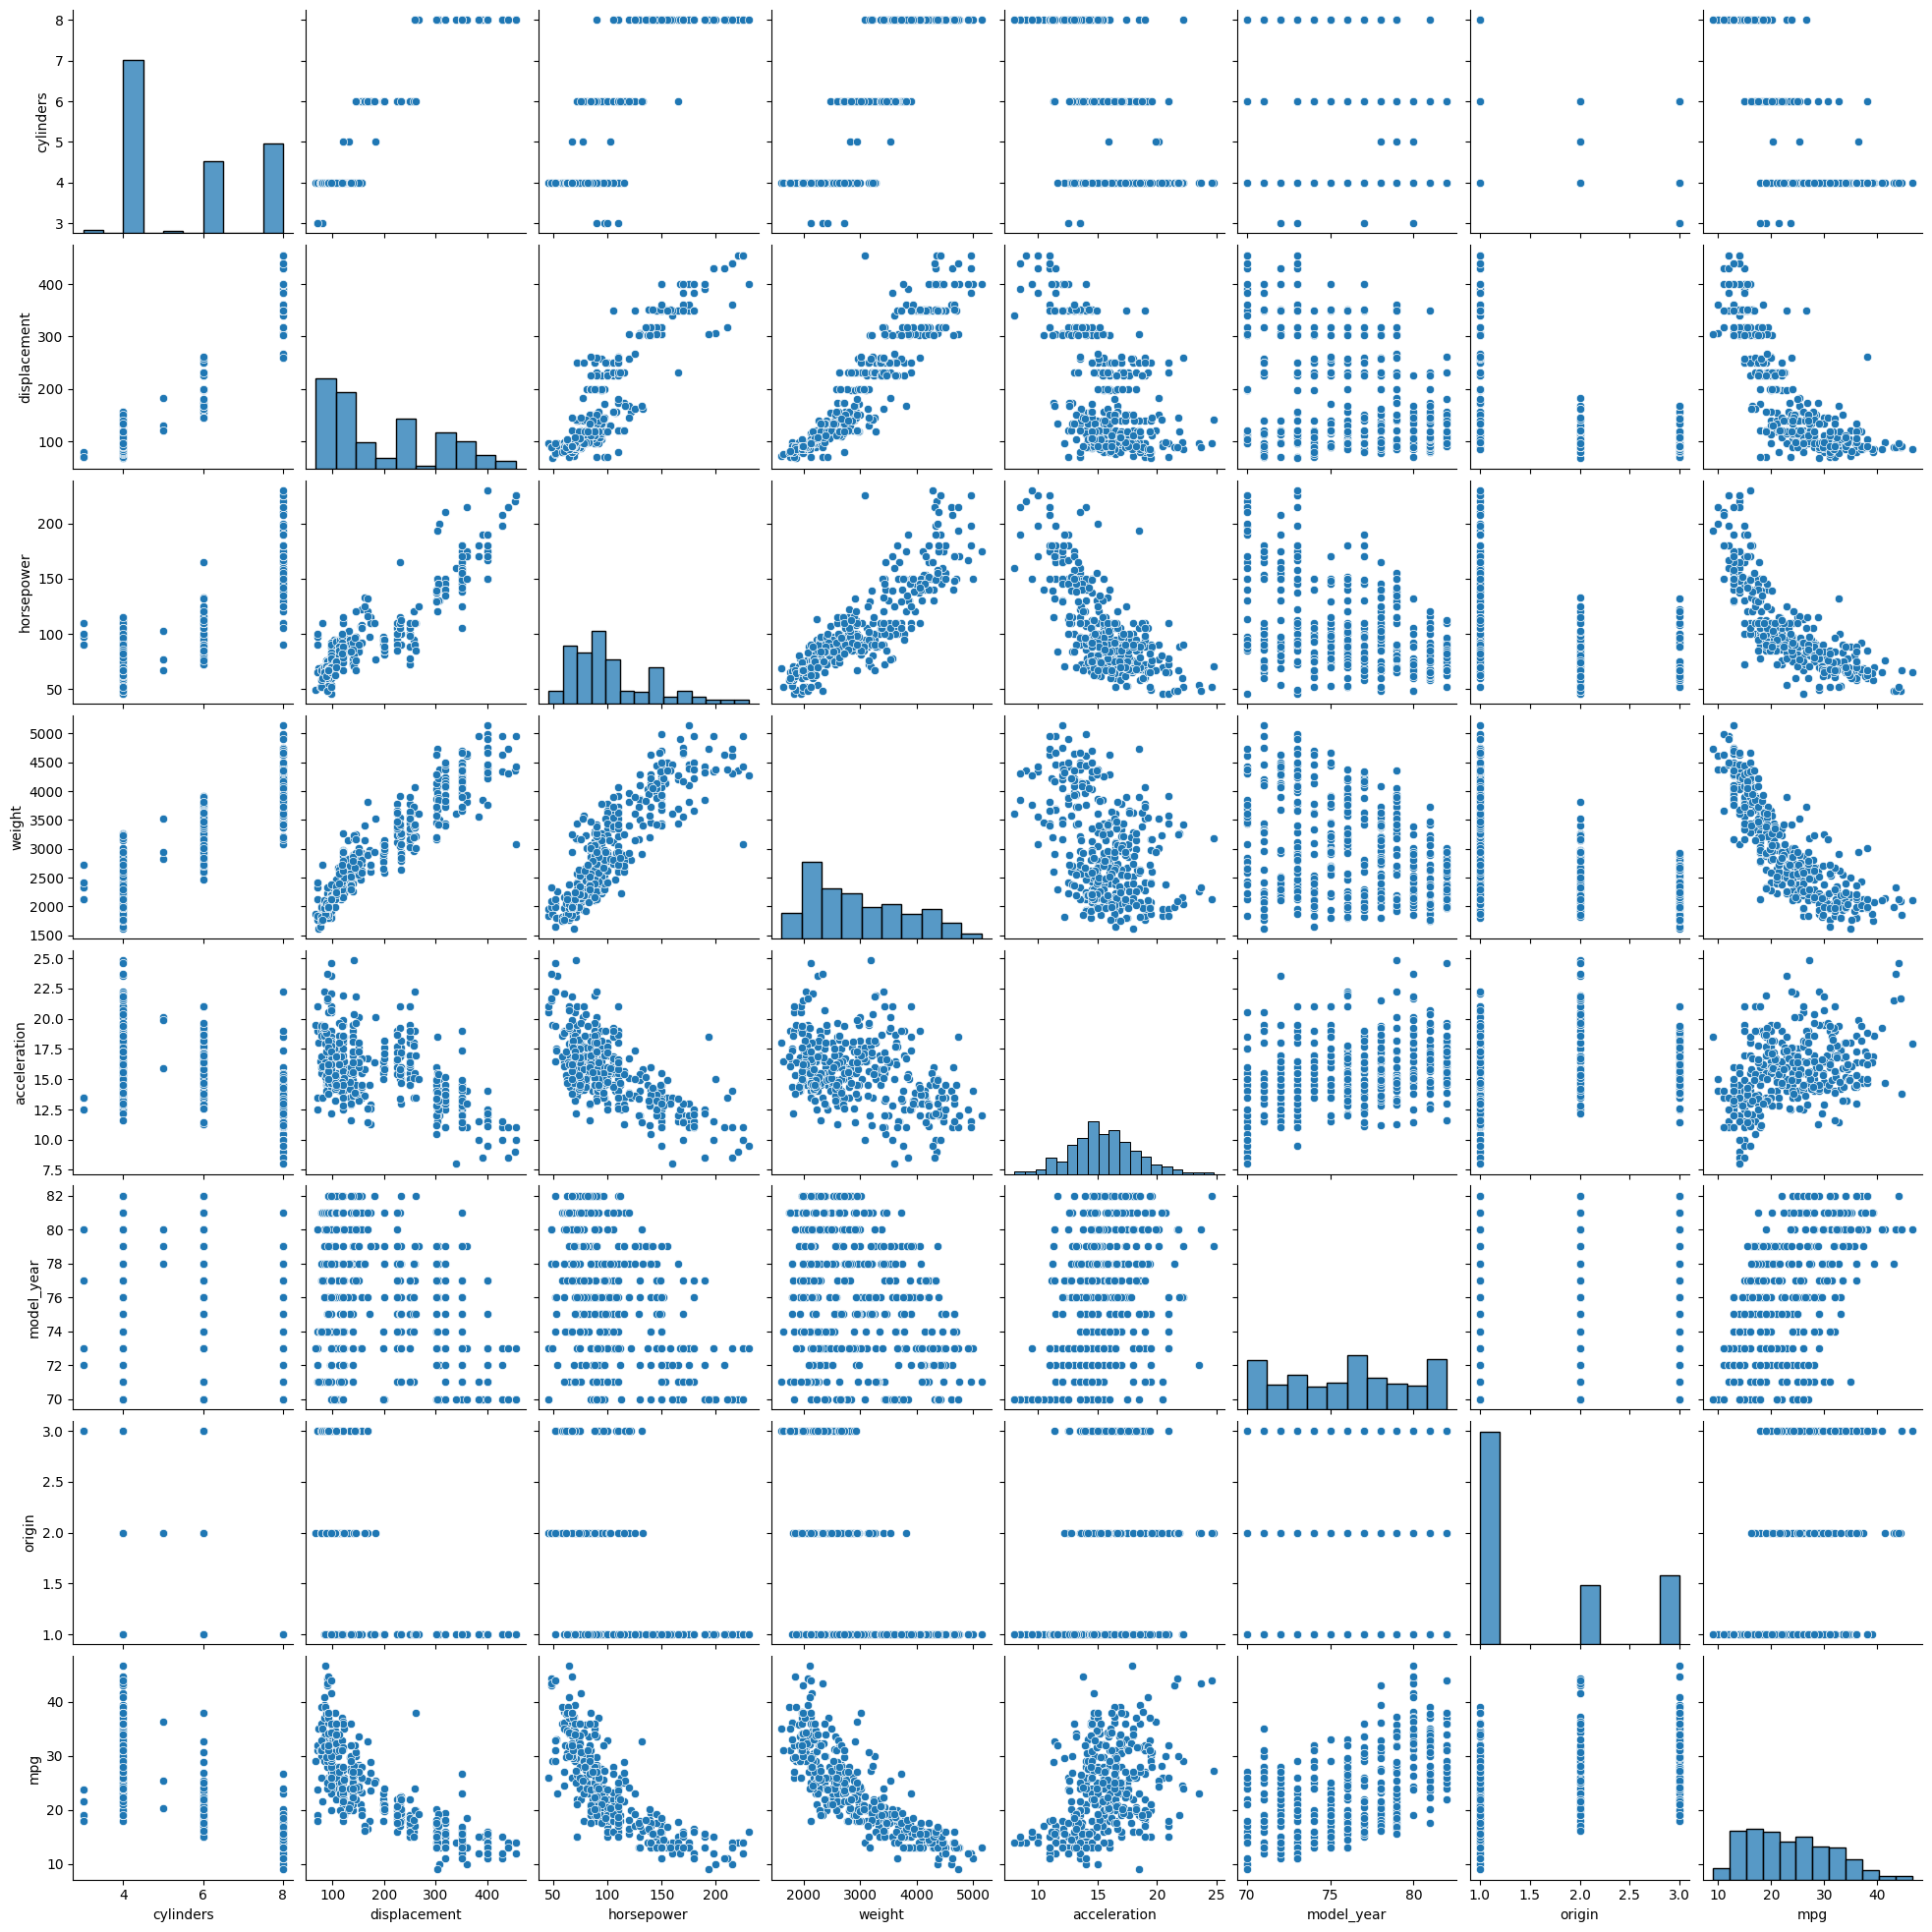

In [187]:
sns.pairplot(df)

# Multivariate

In [185]:
df.drop(columns=['car_name'], inplace=True)


   cylinders  displacement  horsepower  weight  acceleration  model_year  \
0          8         307.0       130.0  3504.0          12.0          70   
1          8         350.0       165.0  3693.0          11.5          70   
2          8         318.0       150.0  3436.0          11.0          70   
3          8         304.0       150.0  3433.0          12.0          70   
4          8         302.0       140.0  3449.0          10.5          70   

   origin   mpg  
0       1  18.0  
1       1  15.0  
2       1  18.0  
3       1  16.0  
4       1  17.0  


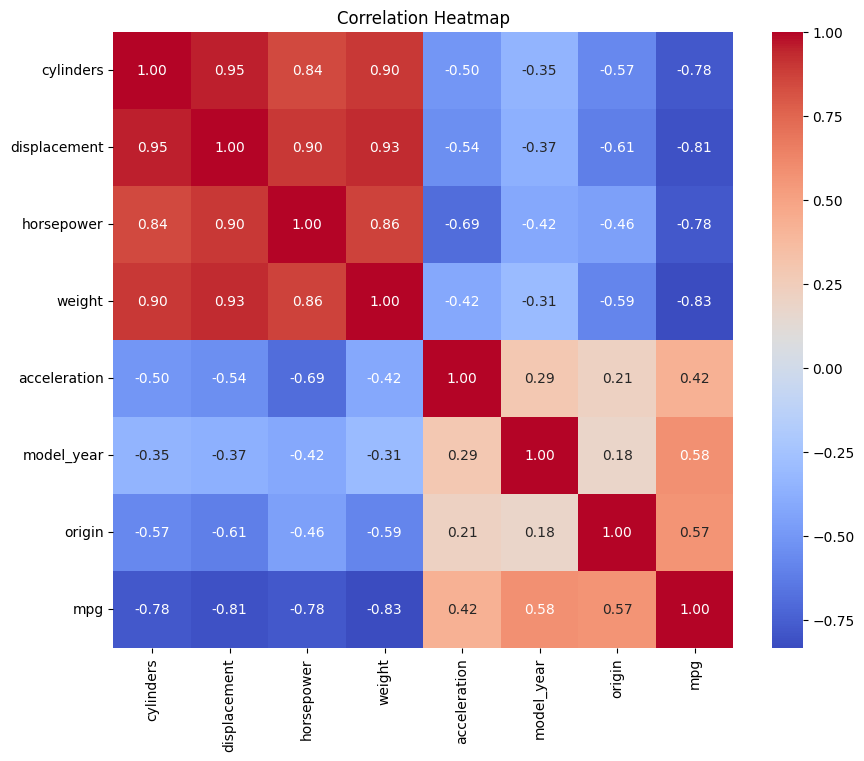

In [186]:
correlation = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
